**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (20 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (8 points)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.linalg import svd,qr,eig,norm
from numpy.linalg import inv
eps = 1e-8

A = np.array([[10,-10,16],[2,-5,20],[1,-4,13]]).T

U,s,Vt = svd(A, False)
Q,R = qr(A)
rank1 = np.sum(s>eps)
rank2 = np.sum(np.abs(np.diag(R))>eps)
assert rank1 == rank2

e,V = eig(A)
A_new = inv(V)@A@V
A_new[A_new < eps] = 0

**2**. (20 points)

You are given the following x-y coordinates (first column is x, second is y)

```
array([[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
```

- Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data. 
- Plot the data and fitted curve using `matplotlib`.

In [2]:
xs = np.array([
    [  0.        ,   4.12306991],
    [  3.        , -15.47355729],
    [  4.        , -11.68725507],
    [  3.        , -20.33756693],
    [  5.        ,  -6.06401989],
    [  6.        ,  32.79353057],
    [  8.        ,  82.48658405],
    [  9.        ,  84.02971858],
    [  4.        ,  -1.30587276],
    [  8.        ,  68.59409878]])

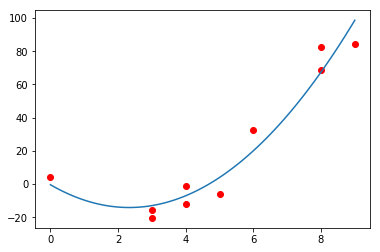

In [3]:
from scipy.linalg import lstsq
y = xs[:,1]
X = np.c_[[1]*len(xs), xs[:,0], xs[:,0]**2]

coeff, res, rank, s = lstsq(X,y)

plt.plot(xs[:,0], y, 'ro')
x_co = np.linspace(0,9,100)
plt.plot(x_co, np.c_[[1]*100, x_co, x_co**2] @ coeff)
pass

**3**. (20 points)

Use the `svd` function to solve the least squares problem above, and repeat the same plot. Calculate the residual error $\lvert y - X\beta \rvert$.

residual error is:
 29.018088805093498


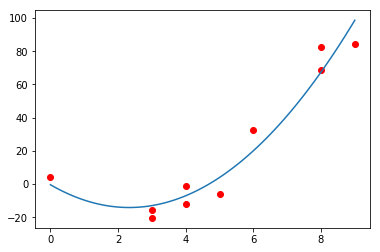

In [4]:
_, s, Vt = svd(X)
beta = Vt.T@np.diag(1/s**2)@Vt @ X.T @ y
res = norm(y - X@beta)
print('residual error is:\n', res)

plt.plot(xs[:,0], y, 'ro')
x_co = np.linspace(0,9,100)
plt.plot(x_co, np.c_[[1]*len(x_co), x_co, x_co**2] @ beta)
pass

In [5]:
res**2

842.0494779002926

**4**. (20 points) 

Avoiding catastrophic cancellation.

Read the Wikipedia entry on [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance). Then answer the following problem:

The tail of the standard logistic distribution is given by $1 - F(t) = 1 - (1+e^{-t})^{-1}$.

- Define a function `f1` to calculate the tail probability of the logistic distribution using the formula given above
- Use [`sympy`](http://docs.sympy.org/latest/index.html) to find the exact value of the tail distribution (using the same symbolic formula) to 20 decimal digits
- Calculate the *relative error* of `f1` when $t = 25$ (The relative error is given by `abs(exact - approximate)/exact`)
- Rewrite the expression for the tail of the logistic distribution using simple algebra so that there is no risk of cancellation, and write a function `f2` using this formula. Calculate the *relative error* of `f2` when $t = 25$. 
- How much more accurate is `f2` compared with `f1` in terms of the relative error?

In [6]:
from sympy import symbols,exp,N
def f1(t):
    return 1-1/(1+np.exp(-t))

t = symbols('t')
exact_expr = 1-1/(1+exp(-t))
exact = N(exact_expr.subs(t,25), 20)
f1_rerr = abs(exact-f1(25))/exact

def f2(t):
    return 1/(np.exp(t)+1)
f2_rerr = abs(exact-f2(25))/exact
print('relative error decreased by %i scale'%(f1_rerr/f2_rerr))

relative error decreased by 18128623032 scale


**5**. (20 points)

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

In [7]:
from skimage import io
img = io.imread('figs/elephant.jpg', as_grey=True)

In [8]:
m,n = img.shape
U,s,Vt = svd(img)
rank = len(s>eps)
topk = np.argmax((np.cumsum(s**2)/np.sum(s**2)) > 99.5/100) + 1
print('only need to preserve top %i rank'%topk)
img_rec = U[:,:topk]@np.diag(s[:topk])@Vt[:topk,:]
print('the relative size of compressed image is %i%%'%((m*topk+topk+n*topk)/(m*n)*100))

only need to preserve top 21 rank
the relative size of compressed image is 3%


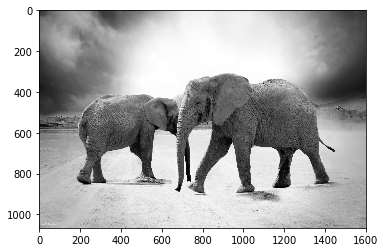

In [9]:
plt.imshow(img, cmap='gray')
pass

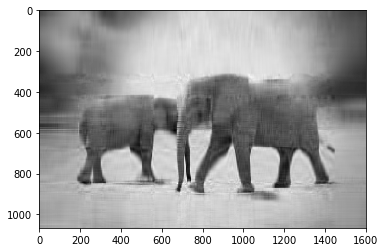

In [10]:
plt.imshow(img_rec, cmap='gray')
pass